# 고양이 수염 스티커 프로젝트

## 프로젝트 개요
- **목표**: 고양이 사진에 수염 스티커를 자연스럽게 적용하기
- **사용 기술**: OpenCV, dlib, NumPy
- **핵심 기능**: 
  1. 얼굴 감지 (Face Detection)
  2. 랜드마크 추출 (Facial Landmarks)
  3. 스티커 적용 (Image Overlay)
  4. 자연스러운 합성 (Alpha Blending)

---

## Step 1: 라이브러리 불러오기

필요한 라이브러리들을 불러옵니다:
- `os`: 파일 경로 처리
- `cv2`: OpenCV - 이미지 처리
- `matplotlib`: 이미지 시각화
- `numpy`: 배열 연산
- `dlib`: 얼굴 감지 및 랜드마크 추출

In [44]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

# Matplotlib 한글 폰트 설정 (선택사항)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

print(" 라이브러리 불러오기 완료!")
print(f"OpenCV 버전: {cv2.__version__}")
print(f"NumPy 버전: {np.__version__}")

 라이브러리 불러오기 완료!
OpenCV 버전: 4.13.0
NumPy 버전: 2.4.2


## Step 2: 이미지 파일 경로 설정 및 불러오기

작업할 이미지들의 경로를 설정하고 불러옵니다:
- **my_image_path**: 원본 이미지
- **sticker_path**: 수염 스티커 이미지


In [45]:
# 현재 디렉토리 기준 이미지 파일 경로 설정
my_image_path = os.path.join(os.getcwd(), 'images/me.png')
sticker_path = os.path.join(os.getcwd(), 'images/whiskser.png')

# 이미지 파일 존재 확인
if not os.path.exists(my_image_path):
    print(f" 이미지를 찾을 수 없습니다: {my_image_path}")
else:
    print(f" 이미지 경로: {my_image_path}")

if not os.path.exists(sticker_path):
    print(f" 수염 스티커를 찾을 수 없습니다: {sticker_path}")
else:
    print(f" 수염 스티커 경로: {sticker_path}")

# BGR 형식으로 이미지 불러오기 (OpenCV 기본 형식)
img_bgr = cv2.imread(my_image_path)

# 작업용 이미지 복사본 생성
img_show = img_bgr.copy()

# RGB 형식으로 변환 (Matplotlib 출력용)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

print(f"\n이미지 크기: {img_rgb.shape}")
print(f"- 높이: {img_rgb.shape[0]} 픽셀")
print(f"- 너비: {img_rgb.shape[1]} 픽셀")
print(f"- 채널: {img_rgb.shape[2]} (RGB)")

 이미지 경로: /Users/macminim4/PyCharmMiscProject/Aiffel/feb/CV/images/me.png
 수염 스티커 경로: /Users/macminim4/PyCharmMiscProject/Aiffel/feb/CV/images/whiskser.png

이미지 크기: (360, 360, 3)
- 높이: 360 픽셀
- 너비: 360 픽셀
- 채널: 3 (RGB)


### 원본 이미지 확인

불러온 고양이 이미지를 확인합니다.

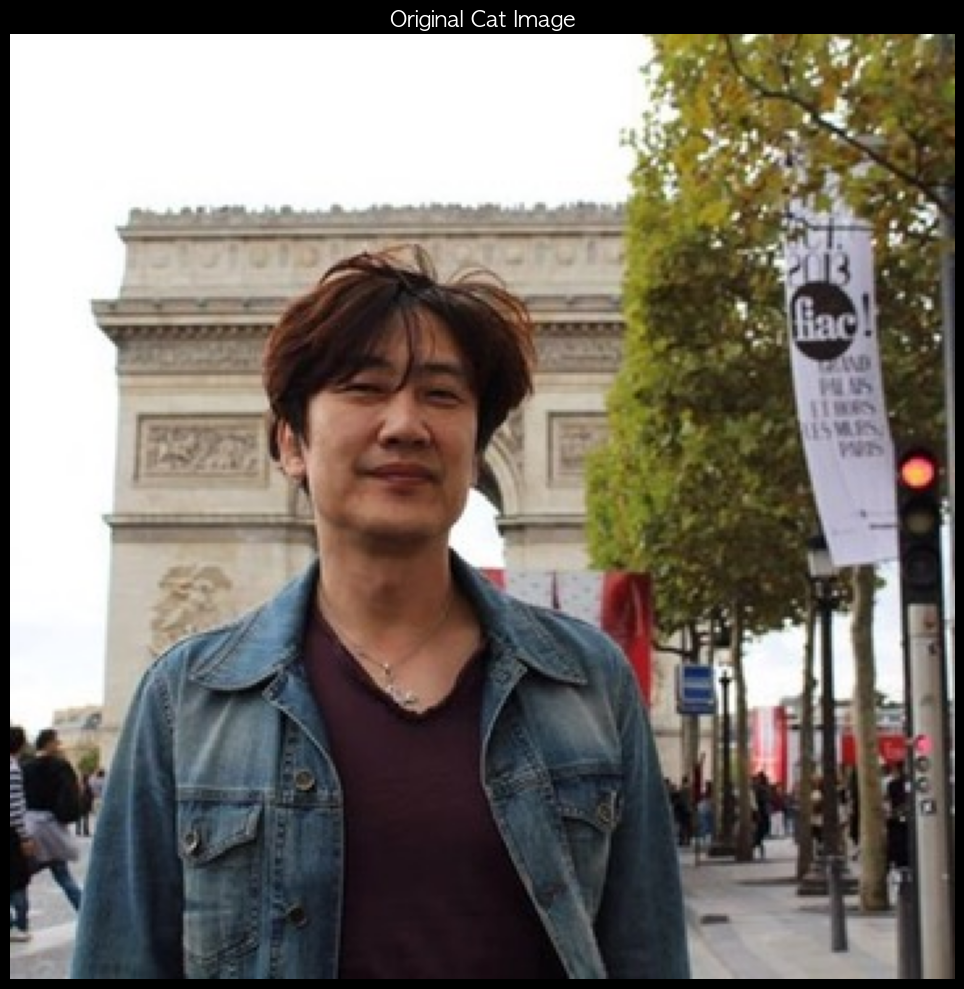

In [32]:
# 원본 이미지 출력
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.title('Original Cat Image', fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

## Step 3: 얼굴 감지 (Face Detection)

dlib의 HOG(Histogram of Oriented Gradients) 기반 얼굴 감지기를 사용합니다.

**작동 원리**:
1. 이미지에서 얼굴 패턴을 찾습니다
2. 얼굴 영역의 사각형 좌표를 반환합니다
3. 여러 얼굴이 있을 경우 모두 감지합니다

In [46]:
# HOG 기반 얼굴 감지기 생성
detector_hog = dlib.get_frontal_face_detector()

# 얼굴 감지 실행
# 파라미터: (이미지, 업샘플링 횟수)
# 업샘플링: 이미지를 확대하여 더 작은 얼굴도 감지 (1은 원본 크기)
dlib_rects = detector_hog(img_rgb, 1)

print(f" 감지된 얼굴 수: {len(dlib_rects)}")
print("\n=" * 50)

# 각 얼굴 영역 정보 출력
for i, rect in enumerate(dlib_rects):
    print(f"\n얼굴 #{i+1} 정보:")
    print(f"  - 왼쪽 (left): {rect.left()}")
    print(f"  - 위쪽 (top): {rect.top()}")
    print(f"  - 오른쪽 (right): {rect.right()}")
    print(f"  - 아래쪽 (bottom): {rect.bottom()}")
    print(f"  - 너비 (width): {rect.width()}")
    print(f"  - 높이 (height): {rect.height()}")

 감지된 얼굴 수: 1

=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=

얼굴 #1 정보:
  - 왼쪽 (left): 113
  - 위쪽 (top): 113
  - 오른쪽 (right): 187
  - 아래쪽 (bottom): 188
  - 너비 (width): 75
  - 높이 (height): 76


### 감지된 얼굴 영역 시각화

감지된 얼굴 주위에 초록색 사각형을 그려서 확인합니다.

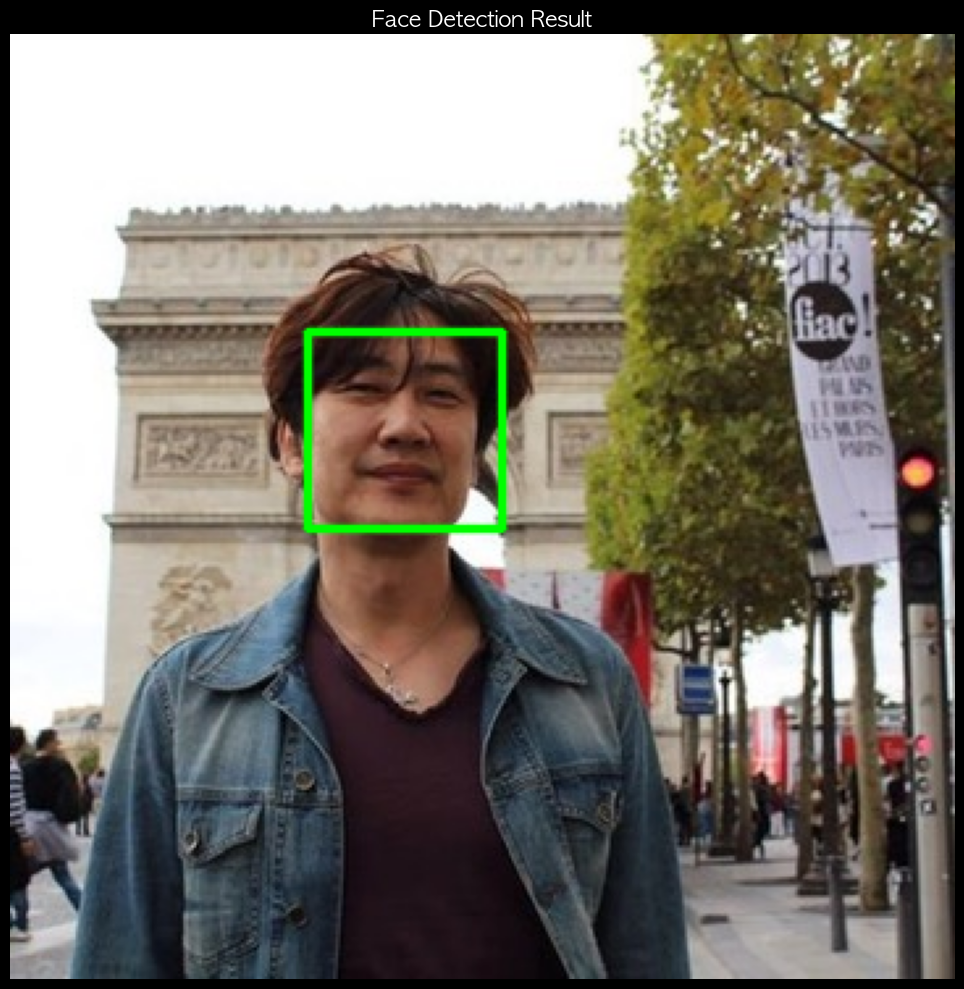

In [34]:
# 시각화용 이미지 복사
img_face_detected = img_show.copy()

# 각 얼굴 영역에 사각형 그리기
for dlib_rect in dlib_rects:
    l = dlib_rect.left()    # 왼쪽 x 좌표
    t = dlib_rect.top()     # 위쪽 y 좌표
    r = dlib_rect.right()   # 오른쪽 x 좌표
    b = dlib_rect.bottom()  # 아래쪽 y 좌표
    
    # cv2.rectangle(이미지, 시작점, 끝점, 색상(BGR), 두께, 선타입)
    cv2.rectangle(img_face_detected, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)

# 결과 출력
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_face_detected, cv2.COLOR_BGR2RGB))
plt.title('Face Detection Result', fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

## Step 4: 얼굴 랜드마크 추출 (Facial Landmarks)

**랜드마크란?**
- 얼굴의 주요 특징점 68개를 감지합니다
- 눈, 코, 입, 턱 등의 정확한 위치를 파악합니다
- 이 점들을 활용하여 스티커를 정확한 위치에 배치합니다

**랜드마크 번호**:
- 0-16: 턱 라인
- 17-21: 왼쪽 눈썹
- 22-26: 오른쪽 눈썹
- 27-35: 코
- **33번: 코 끝**  (수염 위치 기준점)
- 36-41: 왼쪽 눈
- 42-47: 오른쪽 눈
- 48-67: 입

In [47]:
# 랜드마크 모델 경로 설정
model_path = os.path.join(os.getcwd(), 'images/shape_predictor_68_face_landmarks.dat')

# 모델 파일 존재 확인
if not os.path.exists(model_path):
    print(f" 랜드마크 모델을 찾을 수 없습니다: {model_path}")
    print("\n모델 다운로드 방법:")
    print("http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2")
else:
    print(f" 랜드마크 모델 경로: {model_path}")

# shape predictor 모델 로드
landmark_predictor = dlib.shape_predictor(model_path)

print(" 랜드마크 모델 로드 완료!")

 랜드마크 모델 경로: /Users/macminim4/PyCharmMiscProject/Aiffel/feb/CV/images/shape_predictor_68_face_landmarks.dat
 랜드마크 모델 로드 완료!


### 랜드마크 추출 및 저장

In [48]:
# 모든 얼굴의 랜드마크를 저장할 리스트
list_landmarks = []

# 각 얼굴에 대해 랜드마크 추출
for dlib_rect in dlib_rects:
    # 랜드마크 예측
    points = landmark_predictor(img_rgb, dlib_rect)
    
    # dlib.full_object_detection 객체를 (x, y) 튜플 리스트로 변환
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    
    # 리스트에 추가
    list_landmarks.append(list_points)

print(f" {len(list_landmarks)}개 얼굴의 랜드마크 추출 완료!")
print(f"각 얼굴당 랜드마크 개수: {len(list_landmarks[0])}개")

 1개 얼굴의 랜드마크 추출 완료!
각 얼굴당 랜드마크 개수: 68개


### 랜드마크 시각화

추출된 68개의 랜드마크를 이미지 위에 표시합니다.
- 노란색 점: 일반 랜드마크
- 빨간색 큰 점: 코 끝 (33번, 수염 기준점)

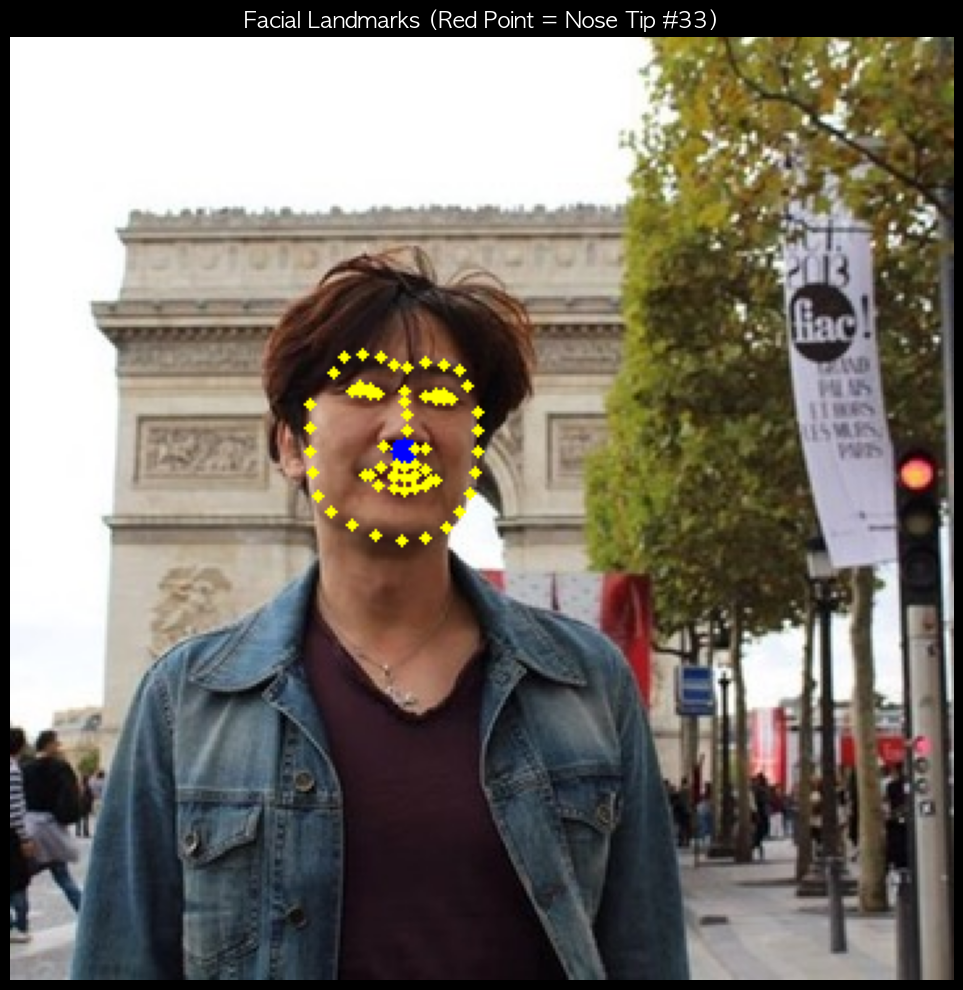


 코 끝 위치 (landmark 33): (150, 158)


In [50]:
# 랜드마크 시각화용 이미지
img_landmarks = img_show.copy()

# 각 얼굴의 랜드마크 그리기
for landmark in list_landmarks:
    for idx, point in enumerate(landmark):
        if idx == 33:  # 코 끝은 빨간색 큰 점으로 표시
            cv2.circle(img_landmarks, point, 5, (255, 0, 0), -1)
        else:  # 나머지는 노란색 작은 점
            cv2.circle(img_landmarks, point, 2, (0, 255, 255), -1)

# 결과 출력
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_landmarks, cv2.COLOR_BGR2RGB))
plt.title('Facial Landmarks (Red Point = Nose Tip #33)', fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

# 코 끝 좌표 출력
if len(list_landmarks) > 0:
    nose_tip = list_landmarks[0][33]
    print(f"\n 코 끝 위치 (landmark 33): {nose_tip}")

## Step 5: 수염 스티커 적용 (방법 1: np.where)

**np.where 방식**:
- 조건에 따라 픽셀을 선택적으로 적용합니다
- 흰색 배경(픽셀 값 > 250)은 원본 이미지를 유지
- 검은색 수염 부분은 스티커 이미지를 적용

**장점**: 간단하고 빠름  
**단점**: 경계가 선명하여 다소 부자연스러울 수 있음

In [53]:
# 결과 저장용 이미지
img_result1 = img_bgr.copy()

# 각 얼굴에 대해 스티커 적용
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print("=" * 50)
    print("수염 스티커 적용 중...")
    
    # 1. 기준점 설정 (코 끝, landmark 33번)
    x = landmark[33][0]
    y = landmark[33][1]
    print(f"기준점 (코 끝): ({x}, {y})")
    
    # 2. 스티커 크기 결정
    # 수염은 얼굴보다 넓어야 하므로 width * 1.5
    w = int(dlib_rect.width() * 1.5)
    h = int(dlib_rect.height() * 0.6)
    print(f"스티커 크기: {w} x {h}")
    
    # 3. 수염 이미지 불러오기 및 크기 조정
    img_sticker = cv2.imread(sticker_path)
    img_sticker = cv2.resize(img_sticker, (w, h))
    print(f"리사이즈 완료: {img_sticker.shape}")
    
    # 4. 스티커 위치 조정
    # x: 코를 중심으로 좌우 균등 배치
    # y: 코 바로 아래에 위치
    refined_x = x - w // 2
    refined_y = y - h // 3
    print(f"초기 위치: ({refined_x}, {refined_y})")
    
    # 5. 이미지 경계 처리
    # 왼쪽 경계 넘어갈 경우
    if refined_x < 0:
        img_sticker = img_sticker[:, -refined_x:]  # 스티커 왼쪽 잘라냄
        refined_x = 0
        print(" 왼쪽 경계 조정")
    
    # 위쪽 경계 넘어갈 경우
    if refined_y < 0:
        img_sticker = img_sticker[-refined_y:, :]  # 스티커 위쪽 잘라냄
        refined_y = 0
        print("️ 위쪽 경계 조정")
    
    # 오른쪽 경계 넘어갈 경우
    if refined_x + img_sticker.shape[1] > img_result1.shape[1]:
        img_sticker = img_sticker[:, :img_result1.shape[1] - refined_x]
        print(" 오른쪽 경계 조정")
    
    # 아래쪽 경계 넘어갈 경우
    if refined_y + img_sticker.shape[0] > img_result1.shape[0]:
        img_sticker = img_sticker[:img_result1.shape[0] - refined_y, :]
        print(" 아래쪽 경계 조정")
    
    print(f"최종 위치: ({refined_x}, {refined_y})")
    print(f"최종 스티커 크기: {img_sticker.shape}")
    
    # 6. 원본 이미지에서 스티커가 들어갈 영역 추출
    sticker_area = img_result1[refined_y:refined_y + img_sticker.shape[0], 
                                refined_x:refined_x + img_sticker.shape[1]]
    
    # 7. np.where를 사용하여 스티커 적용
    # 조건: img_sticker > 250 (흰색 배경)
    # True이면: sticker_area (원본 이미지 유지)
    # False이면: img_sticker (수염 적용)
    img_result1[refined_y:refined_y + img_sticker.shape[0], 
                    refined_x:refined_x + img_sticker.shape[1]] = \
        np.where(img_sticker > 250, sticker_area, img_sticker).astype(np.uint8)
    
    print(" 스티커 적용 완료!")

print("\n" + "=" * 50)
print("모든 얼굴에 스티커 적용 완료!")

수염 스티커 적용 중...
기준점 (코 끝): (150, 158)
스티커 크기: 112 x 45
리사이즈 완료: (45, 112, 3)
초기 위치: (94, 143)
최종 위치: (94, 143)
최종 스티커 크기: (45, 112, 3)
 스티커 적용 완료!

모든 얼굴에 스티커 적용 완료!


### 결과 확인 (np.where 방식)

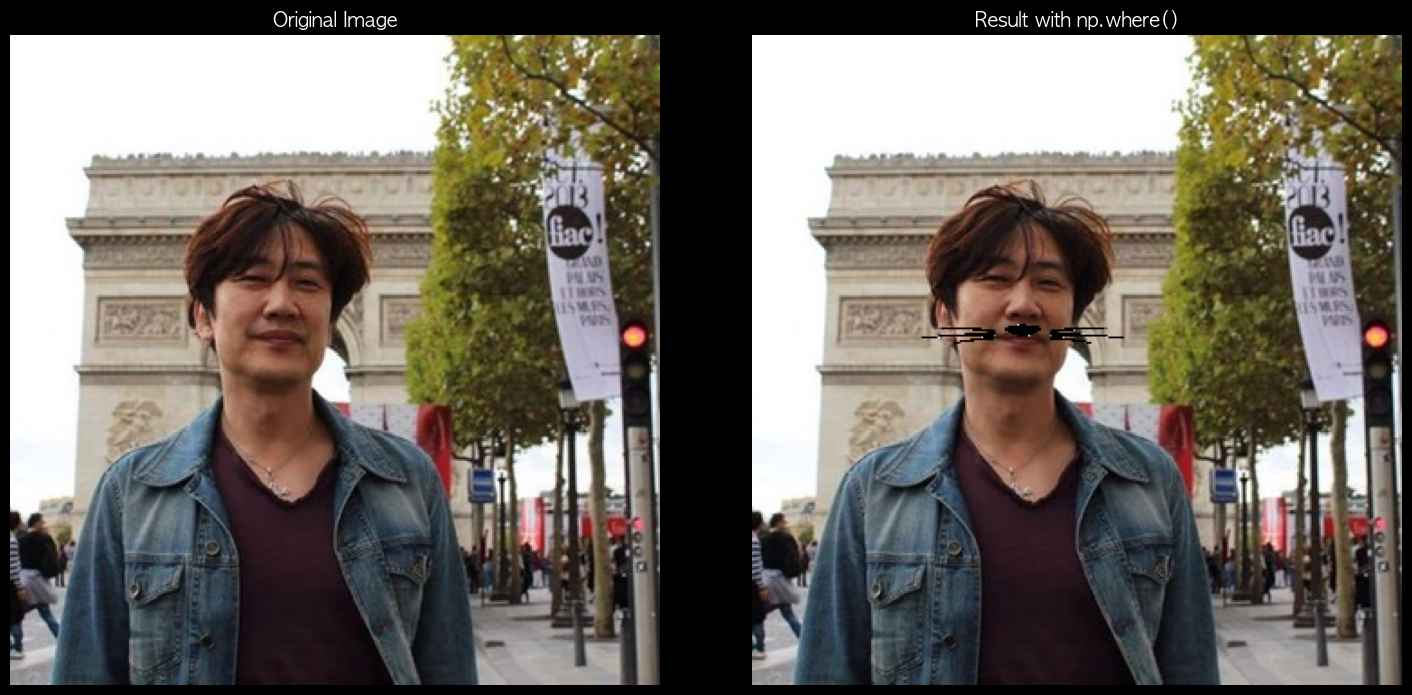

In [39]:
# 결과 비교 출력
plt.figure(figsize=(15, 7))

# 원본 이미지
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.title('Original Image', fontsize=14, fontweight='bold')
plt.axis('off')

# np.where 적용 결과
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_result1, cv2.COLOR_BGR2RGB))
plt.title('Result with np.where()', fontsize=14, fontweight='bold')
plt.axis('off')

plt.tight_layout()
plt.show()

## Step 6: 자연스러운 스티커 적용 (방법 2: cv2.addWeighted)

**cv2.addWeighted 방식**:
- 두 이미지를 가중치를 두고 합성합니다
- 수식: `result = src1 * alpha + src2 * beta + gamma`
- 스티커와 원본 이미지가 부드럽게 섞여 더 자연스러운 효과

**장점**: 경계가 부드럽고 자연스러움  
**단점**: np.where보다 조금 더 복잡함

**파라미터 설명**:
- `alpha = 0.7`: 스티커의 투명도 70%
- `beta = 0.3`: 원본 이미지의 투명도 30%
- 값을 조정하여 원하는 효과를 얻을 수 있습니다

In [54]:
# 결과 저장용 이미지
img_result2 = img_bgr.copy()

# 각 얼굴에 대해 스티커 적용
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print("=" * 50)
    print("자연스러운 수염 스티커 적용 중...")
    
    # 1-4. 기준점, 크기, 위치 설정 (이전과 동일)
    x = landmark[33][0]
    y = landmark[33][1]
    
    w = int(dlib_rect.width() * 1.5)
    h = int(dlib_rect.height() * 0.6)
    
    img_sticker = cv2.imread(sticker_path)
    img_sticker = cv2.resize(img_sticker, (w, h))
    
    refined_x = x - w // 2
    refined_y = y - h // 3
    
    # 5. 경계 처리 (이전과 동일)
    if refined_x < 0:
        img_sticker = img_sticker[:, -refined_x:]
        refined_x = 0
    if refined_y < 0:
        img_sticker = img_sticker[-refined_y:, :]
        refined_y = 0
    if refined_x + img_sticker.shape[1] > img_result2.shape[1]:
        img_sticker = img_sticker[:, :img_result2.shape[1] - refined_x]
    if refined_y + img_sticker.shape[0] > img_result2.shape[0]:
        img_sticker = img_sticker[:img_result2.shape[0] - refined_y, :]
    
    sticker_area = img_result2[refined_y:refined_y + img_sticker.shape[0], 
                                refined_x:refined_x + img_sticker.shape[1]]
    
    # 6. 마스크 생성
    print("마스크 생성 중...")
    
    # 스티커를 그레이스케일로 변환
    gray_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2GRAY)
    
    # 이진화: 250보다 작은 부분(검은 수염)을 255로, 나머지(흰색 배경)를 0으로
    _, mask = cv2.threshold(gray_sticker, 250, 255, cv2.THRESH_BINARY_INV)
    
    # 역 마스크 생성 (배경 부분)
    mask_inv = cv2.bitwise_not(mask)
    
    print(f"마스크 크기: {mask.shape}")
    
    # 7. 배경과 전경 분리
    # 원본 이미지에서 스티커 영역 제거 (배경만 남김)
    img_bg = cv2.bitwise_and(sticker_area, sticker_area, mask=mask_inv)
    
    # 스티커에서 수염 부분만 추출 (전경)
    img_fg = cv2.bitwise_and(img_sticker, img_sticker, mask=mask)
    
    # 8. cv2.addWeighted를 사용하여 자연스럽게 합성
    print("가중치 합성 중...")
    
    # alpha=0.7: 스티커 70%
    # beta=0.3: 원본 30%
    # gamma=0: 추가 밝기 조정 없음
    weighted_sticker = cv2.addWeighted(img_fg, 0.7, sticker_area, 0.3, 0)
    
    # 9. 배경과 합성된 전경 결합
    result = cv2.add(img_bg, weighted_sticker)
    
    # 10. 최종 이미지에 적용
    img_result2[refined_y:refined_y + img_sticker.shape[0], 
                    refined_x:refined_x + img_sticker.shape[1]] = result
    
    print(" 자연스러운 스티커 적용 완료!")

print("\n" + "=" * 50)
print("모든 얼굴에 자연스러운 스티커 적용 완료!")

자연스러운 수염 스티커 적용 중...
마스크 생성 중...
마스크 크기: (45, 112)
가중치 합성 중...
 자연스러운 스티커 적용 완료!

모든 얼굴에 자연스러운 스티커 적용 완료!


### 두 방법 비교

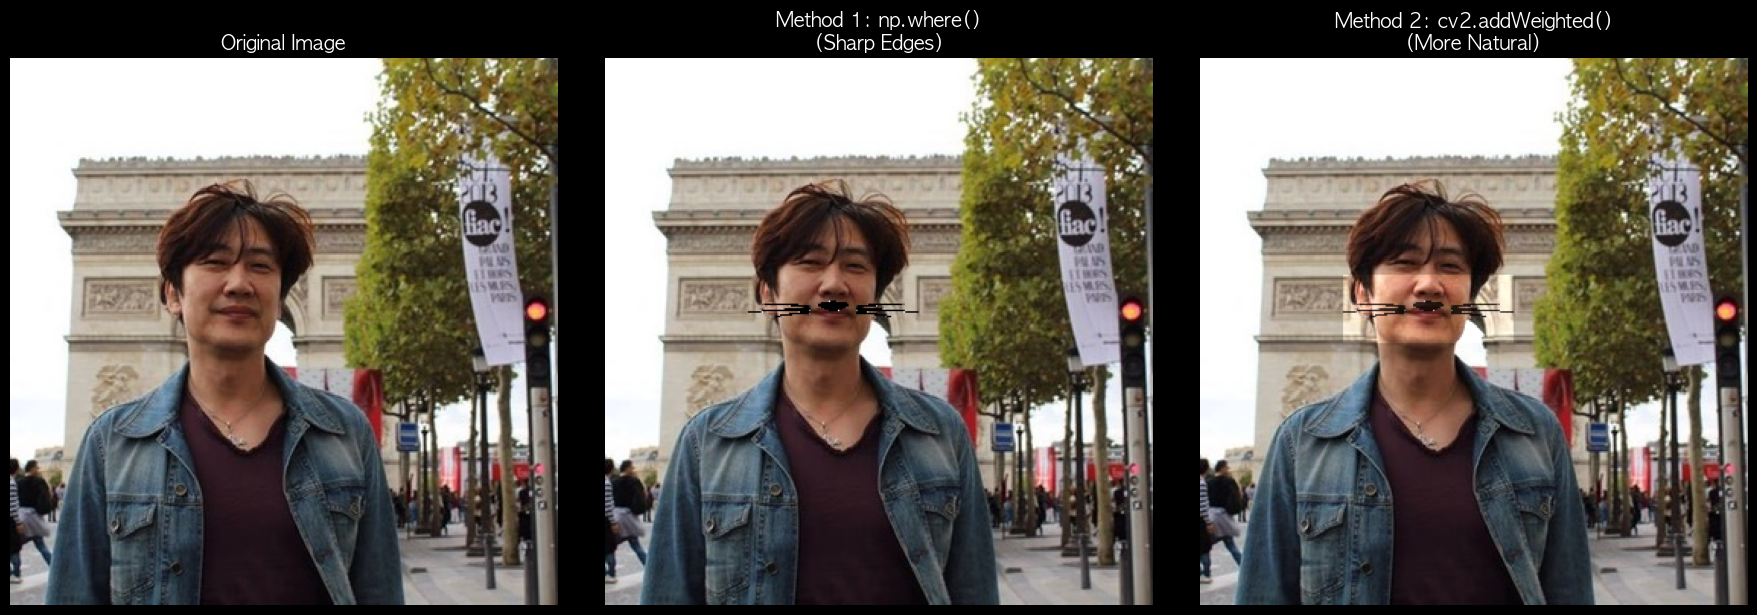


 비교 포인트:
   - 방법 1 (np.where): 경계가 선명하고 명확함
   - 방법 2 (addWeighted): 경계가 부드럽고 자연스러움


In [55]:
# 세 이미지 비교 출력
plt.figure(figsize=(18, 6))

# 원본 이미지
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.title('Original Image', fontsize=14, fontweight='bold')
plt.axis('off')

# np.where 결과
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img_result1, cv2.COLOR_BGR2RGB))
plt.title('Method 1: np.where()\n(Sharp Edges)', fontsize=14, fontweight='bold')
plt.axis('off')

# addWeighted 결과
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(img_result2, cv2.COLOR_BGR2RGB))
plt.title('Method 2: cv2.addWeighted()\n(More Natural)', fontsize=14, fontweight='bold')
plt.axis('off')

plt.tight_layout()
plt.show()

print("\n 비교 포인트:")
print("   - 방법 1 (np.where): 경계가 선명하고 명확함")
print("   - 방법 2 (addWeighted): 경계가 부드럽고 자연스러움")

## Step 7: 문제점 분석 및 개선 방안

스티커 앱을 만들면서 발견할 수 있는 주요 문제점들을 분석합니다.

In [56]:
print("=" * 70)
print(" " * 20 + "스티커 앱 문제점 분석")
print("=" * 70)

print("\n 1. 얼굴 각도 문제")
print("-" * 70)
print("   [현상]")
print("   - 측면이나 대각선에서 촬영 시 스티커가 부자연스럽게 보임")
print("   - 얼굴이 기울어져도 스티커는 항상 수평으로 유지됨")
print("\n   [원인]")
print("   - 스티커가 얼굴 회전을 따라가지 못함")
print("   - 2D 평면 이미지로 3D 회전을 표현할 수 없음")
print("\n   [해결 방안]")
print("   - 양쪽 눈의 좌표로 얼굴 기울기 각도 계산")
print("   - cv2.getRotationMatrix2D()로 스티커 회전")
print("   - 3D 모델링을 활용한 perspective transformation 적용")
print("\n   [코드 예시]")
print("   angle = np.degrees(np.arctan2(right_eye[1] - left_eye[1],")
print("                                  right_eye[0] - left_eye[0]))")
print("   rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)")

print("\n" + "=" * 70)
print("\n 2. 거리 문제 (멀리서 촬영)")
print("-" * 70)
print("   [현상]")
print("   - 얼굴이 작으면 감지 실패하거나 스티커가 너무 작아 보임")
print("   - 카메라와의 거리가 멀면 인식률 저하")
print("\n   [원인]")
print("   - dlib HOG 감지기는 최소 크기(약 80x80 픽셀) 이하의 얼굴을 감지하지 못함")
print("   - 작은 얼굴은 랜드마크 정확도가 떨어짐")
print("\n   [해결 방안]")
print("   - 최소 얼굴 크기 기준 설정 (100x100 이상 권장)")
print("   - 이미지 업스케일링 후 처리 (detector의 2번째 파라미터 활용)")
print("   - 감지 실패 시 사용자에게 가까이 다가가도록 안내")
print("\n   [코드 예시]")
print("   if dlib_rect.width() < 100 or dlib_rect.height() < 100:")
print("       print('얼굴이 너무 작습니다. 가까이 다가가주세요!')")

print("\n" + "=" * 70)
print("\n 3. 얼굴 방향 문제 (옆으로 누워서 촬영)")
print("-" * 70)
print("   [현상]")
print("   - 90도 회전된 얼굴은 감지되지 않음")
print("   - 누워서 찍으면 랜드마크가 추출되지 않음")
print("\n   [원인]")
print("   - dlib HOG 감지기는 정면 얼굴(frontal face)만 학습됨")
print("   - 심한 회전 각도에서는 얼굴 패턴을 인식하지 못함")
print("\n   [해결 방안]")
print("   - 이미지를 여러 각도(0°, 90°, 180°, 270°)로 회전하여 감지 시도")
print("   - 최신 딥러닝 모델 사용 (MTCNN, RetinaFace, MediaPipe)")
print("   - 사용자에게 얼굴을 바르게 하도록 UI 안내")
print("\n   [코드 예시]")
print("   for angle in [0, 90, 180, 270]:")
print("       rotated = rotate_image(img, angle)")
print("       faces = detector_hog(rotated, 1)")
print("       if len(faces) > 0: return faces, angle")

print("\n" + "=" * 70)
print("\n 4. 실행 속도 문제")
print("-" * 70)
print("   [현상]")
print("   - 실시간 카메라 필터로 사용하기에는 프레임 레이트가 낮음")
print("   - 고해상도 이미지 처리 시 지연 발생")
print("\n   [원인]")
print("   - dlib landmark 추출은 계산량이 많음 (CPU 기반)")
print("   - 매 프레임마다 전체 파이프라인 실행")
print("\n   [해결 방안]")
print("   - 이미지 다운스케일링 (0.5배로 축소 후 처리, 좌표만 복원)")
print("   - 프레임 스킵 (2-3 프레임마다 한 번씩만 감지)")
print("   - 더 빠른 모델 사용 (MediaPipe FaceMesh, OpenCV DNN)")
print("   - GPU 가속 활용")
print("\n   [성능 비교]")
print("   - dlib HOG: ~200-500ms/frame (CPU)")
print("   - MediaPipe: ~20-50ms/frame (CPU)")
print("   - MTCNN (GPU): ~10-30ms/frame")

print("\n" + "=" * 70)
print("\n 5. 정확도 문제")
print("-" * 70)
print("   [현상]")
print("   - 어두운 조명에서 랜드마크가 부정확함")
print("   - 안경, 마스크 착용 시 감지 실패 또는 위치 오류")
print("   - 얼굴 일부가 가려진 경우 떨림 현상")
print("\n   [원인]")
print("   - HOG 기반 감지기의 한계 (명암 변화에 민감)")
print("   - 학습 데이터에 없는 상황(마스크, 선글라스) 처리 어려움")
print("\n   [해결 방안]")
print("   - 여러 프레임의 랜드마크 평균값 사용 (smoothing)")
print("   - Kalman 필터를 사용한 landmark 안정화")
print("   - 더 robust한 딥러닝 모델 사용")
print("   - 이미지 전처리 (히스토그램 평활화, 밝기 조정)")
print("\n   [코드 예시]")
print("   landmark_history.append(new_landmarks)")
print("   if len(landmark_history) > 5:")
print("       landmark_history.pop(0)")
print("   smoothed = np.mean(landmark_history, axis=0)")

print("\n" + "=" * 70)
print("\n 종합 평가")
print("-" * 70)
print("\n   [중요도 순위]")
print("    1순위: 실행 속도 (실시간 필터의 필수 요소)")
print("    1순위: 얼굴 각도 대응 (사용성에 직접 영향)")
print("     2순위: 정확도 향상 (사용자 경험 개선)")
print("      2순위: 거리 문제 (감지 범위 확대)")
print("       3순위: 방향 문제 (특수 상황 대응)")

print("\n   [실무 적용 시 권장 사항]")
print("   1. MediaPipe FaceMesh로 모델 교체 (속도 + 정확도)")
print("   2. 랜드마크 smoothing 적용 (떨림 방지)")
print("   3. 얼굴 각도 계산 및 스티커 회전 (자연스러움)")
print("   4. 최소 얼굴 크기 체크 + 사용자 가이드 (UX 개선)")
print("   5. 프레임 스킵 및 이미지 다운스케일링 (성능 최적화)")

print("\n" + "=" * 70)

                    스티커 앱 문제점 분석

 1. 얼굴 각도 문제
----------------------------------------------------------------------
   [현상]
   - 측면이나 대각선에서 촬영 시 스티커가 부자연스럽게 보임
   - 얼굴이 기울어져도 스티커는 항상 수평으로 유지됨

   [원인]
   - 스티커가 얼굴 회전을 따라가지 못함
   - 2D 평면 이미지로 3D 회전을 표현할 수 없음

   [해결 방안]
   - 양쪽 눈의 좌표로 얼굴 기울기 각도 계산
   - cv2.getRotationMatrix2D()로 스티커 회전
   - 3D 모델링을 활용한 perspective transformation 적용

   [코드 예시]
   angle = np.degrees(np.arctan2(right_eye[1] - left_eye[1],
                                  right_eye[0] - left_eye[0]))
   rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)


 2. 거리 문제 (멀리서 촬영)
----------------------------------------------------------------------
   [현상]
   - 얼굴이 작으면 감지 실패하거나 스티커가 너무 작아 보임
   - 카메라와의 거리가 멀면 인식률 저하

   [원인]
   - dlib HOG 감지기는 최소 크기(약 80x80 픽셀) 이하의 얼굴을 감지하지 못함
   - 작은 얼굴은 랜드마크 정확도가 떨어짐

   [해결 방안]
   - 최소 얼굴 크기 기준 설정 (100x100 이상 권장)
   - 이미지 업스케일링 후 처리 (detector의 2번째 파라미터 활용)
   - 감지 실패 시 사용자에게 가까이 다가가도록 안내

   [코드 예시]
   if dlib_rect.width() < 10

## Step 8: 결과 저장하기

완성된 이미지를 파일로 저장합니다.

In [57]:
# 저장할 경로 설정
output_dir = os.path.join(home_dir, 'venv311/images/camera_sticker/output')

# 디렉토리가 없으면 생성
os.makedirs(output_dir, exist_ok=True)

# 결과 이미지 저장
output_path1 = os.path.join(output_dir, 'result_npwhere.png')
output_path2 = os.path.join(output_dir, 'result_addweighted.png')

cv2.imwrite(output_path1, img_result1)
cv2.imwrite(output_path2, img_result2)

print(" 결과 이미지 저장 완료!")
print(f"\n저장 위치:")
print(f"1. {output_path1}")
print(f"2. {output_path2}")

 결과 이미지 저장 완료!

저장 위치:
1. /Users/macminim4/venv311/images/camera_sticker/output/result_npwhere.png
2. /Users/macminim4/venv311/images/camera_sticker/output/result_addweighted.png


##  프로젝트 완료!

### 학습 내용 정리

1. **얼굴 감지**: dlib HOG 기반 감지기로 얼굴 영역 찾기
2. **랜드마크 추출**: 68개의 얼굴 특징점 좌표 얻기
3. **스티커 배치**: 코 끝(landmark 33)을 기준으로 위치 계산
4. **이미지 합성**:
   - `np.where()`: 간단하고 빠른 방법
   - `cv2.addWeighted()`: 자연스러운 합성
5. **문제점 분석**: 실무에서 고려해야 할 5가지 주요 이슈

### 다음 단계 학습 주제

- MediaPipe를 활용한 실시간 얼굴 필터
- 딥러닝 기반 얼굴 인식 (MTCNN, RetinaFace)
- 3D 얼굴 모델링 및 AR 필터
- 모바일 앱 개발 (React Native, Flutter)

---

**제작**: 고양이 수염 스티커 프로젝트  
**날찌**: 2026년 2월6일
**libraries**: Python, OpenCV, dlib, NumPy, Matplotlib